In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import neattext.functions as nfx

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("/content/emotion_dataset_2.csv")

In [ ]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,Why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

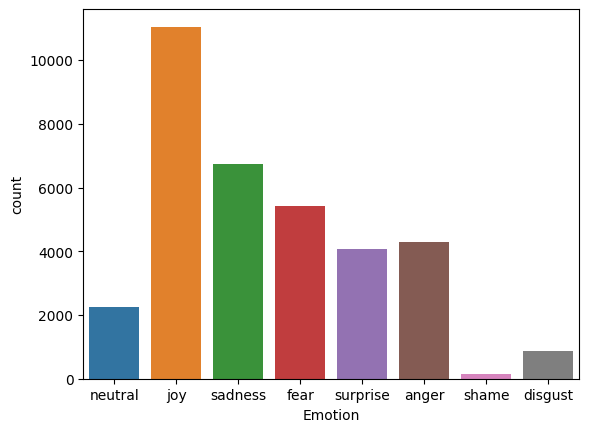

In [ ]:
sns.countplot(x='Emotion',data=df)

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [ ]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.4,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.score(x_test,y_test)

0.6181648343752245

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
ex1 = "The product is fantastic as expected from realme thanks to flipkart😊😊 the front cam is very nice and the rear one is pretty good performance is nice too smooth and the case quality is also nice... It's a value for money product"

In [ ]:
pipe_lr.predict([ex1])

array(['surprise'], dtype=object)

In [ ]:
pipe_lr.predict_proba([ex1])

array([[1.42177713e-05, 6.93374759e-07, 1.29884821e-03, 5.02822464e-02,
        1.99988791e-10, 2.57968214e-02, 8.71889124e-07, 9.22606301e-01]])

In [ ]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
import joblib
pipeline_file = open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
pip install altair

In [ ]:
pip install joblib

In [ ]:
pip install gTTS

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=6da03c031aef99cbae36e4b1d7ee6df4192b07ee7e3791a483fce6bf9dbb9c1b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
%%writefile app.py
import streamlit as st
import altair as alt
import joblib
import pandas as pd
import numpy as np
from gtts import gTTS
from IPython.display import Audio
from langdetect import detect
pipe_lr=joblib.load(open("emotion_classifier_pipe_lr.pkl","rb"))
def predict_emotions(docx):
    results=pipe_lr.predict([docx])
    return results[0]
def get_prediction_proba(docx):
    results=pipe_lr.predict_proba([docx])
    return results
emotions_emoji_dict = {"anger":"😠","disgust":"🤮", "fear":"😨😱", "happy":"🤗", "joy":"😂", "neutral":"😐", "sad":"😔", "sadness":"😔", "shame":"😳", "surprise":"😮"}
def main():
    st.title("Text Emotion Recognition System")
    menu=["Home","About"]
    choice=st.sidebar.selectbox("Menu",menu)
    if choice=="Home":
        st.subheader("Enter the text for emotion prediction")
        with st.form(key='emotion_clf_form'):
            raw_text=st.text_area("Type Here")
            submit_text=st.form_submit_button(label='Submit')

        if submit_text:
            col1,col2,col3=st.columns(3)
            prediction=predict_emotions(raw_text)
            probability=get_prediction_proba(raw_text)
            with col1:
                st.success("Original Text")
                st.write(raw_text)

                st.success('Prediction')

                emoji_icon=emotions_emoji_dict[prediction]
                st.write("{}:{}".format(prediction,emoji_icon))
                st.write("Confidence:{}".format(np.max(probability)))
            with col2:
                st.success("Prediction Probability")
                st.write(probability)
                proba_df=pd.DataFrame(probability,columns=pipe_lr.classes_)
                st.write(proba_df.T)
                proba_df_clean=proba_df.T.reset_index()
                proba_df_clean.columns=["emotions","probability"]

                fig=alt.Chart(proba_df_clean).mark_bar().encode(x='emotions',y='probability',color='emotions')
                st.altair_chart(fig,use_container_width=True)
            with col3:
                st.success("Audio")
                tts = gTTS(raw_text)
                tts.save('1.wav')
                sound_file = '1.wav'
                Audio(sound_file,autoplay=True)
                audio1 = open("1.wav", "rb")
                st.audio(audio1)
    if choice=="About":
        from PIL import Image
        image = Image.open('logo1.png')
        st.image(image, caption='NLP')

def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://garden.spoonflower.com/c/9488458/p/f/m/KSfPv4WgxTcnXDXjxrmWy7s6M1ucitW-StC-E41r9greBWad2pc/Medium%20Dark%20Cyan%20Blue%20Clear%20Spring%20Seasonal%20Color%20Palette.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url()

if __name__=='__main__':
    main()

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 3f0e93ca3374bc7


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.49.154:8501

npx: installed 22 in 6.13s
your url is: https://famous-foxes-thank.loca.lt


In [ ]:
!streamlit run app.py